# **Step 1: Data Exploration**

   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292  

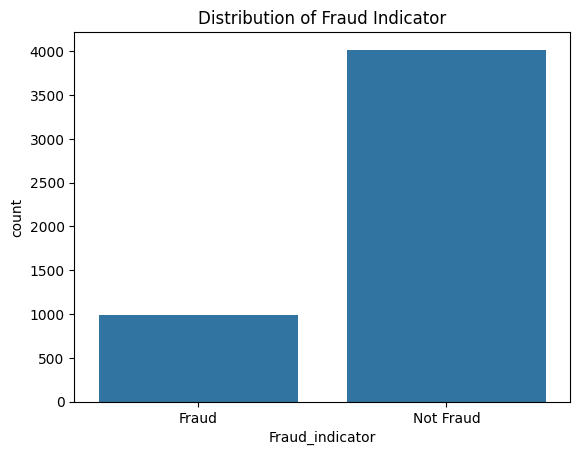

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/FastagFraudDetection.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics of the dataset
print(df.describe())

# Distribution of the target variable (Fraud Indicator)
sns.countplot(x='Fraud_indicator', data=df)
plt.title('Distribution of Fraud Indicator')
plt.show()


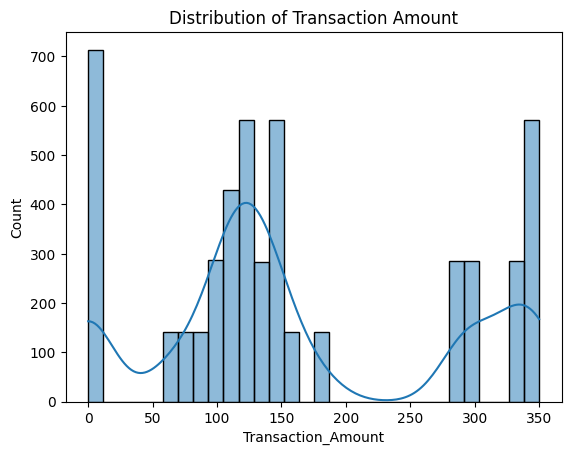

In [ ]:
# Distribution of transaction amount
sns.histplot(df['Transaction_Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()



Missing values in each column:
Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

Summary statistics of the dataset:
       Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.0000

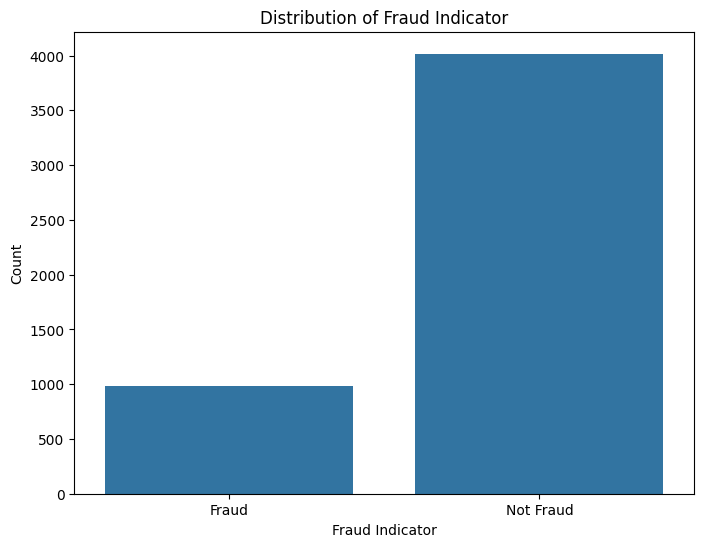

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Distribution of the target variable (Fraud Indicator)
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud_indicator', data=df)
plt.title('Distribution of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

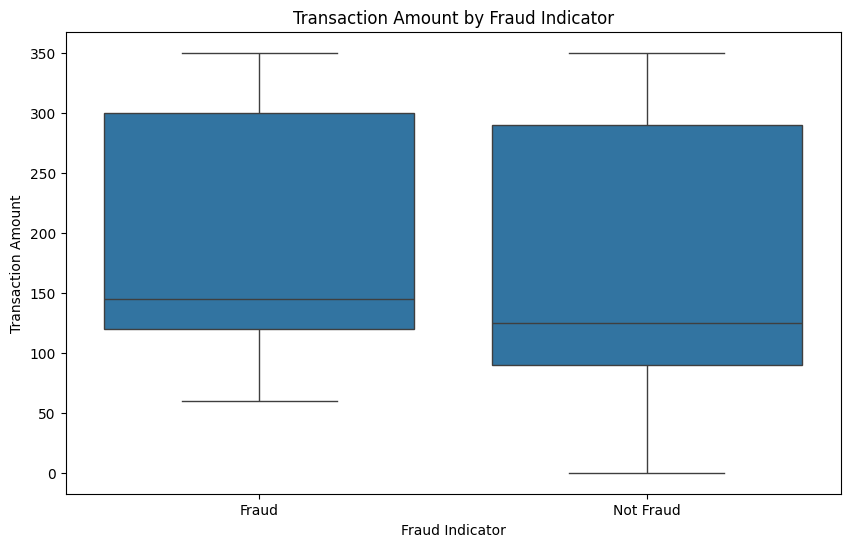

In [ ]:
# Distribution of Transaction Amount by Fraud Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df)
plt.title('Transaction Amount by Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Transaction Amount')
plt.show()

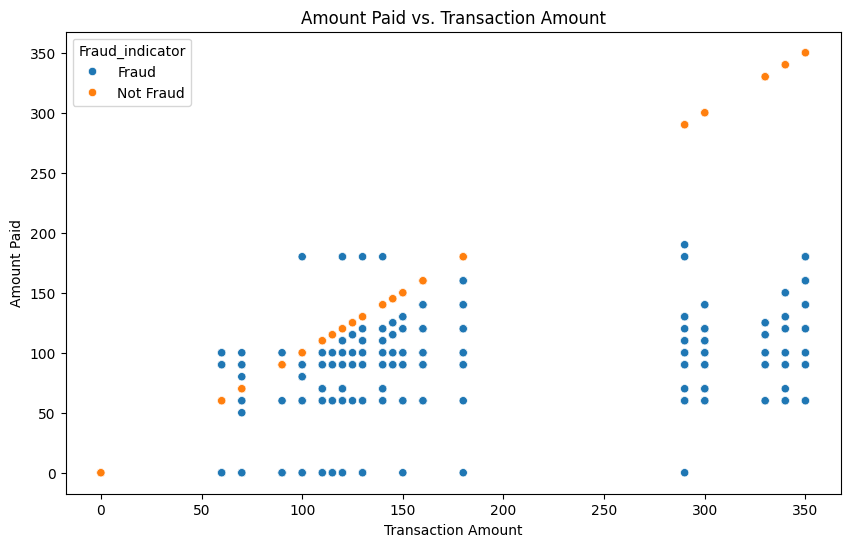

In [ ]:
# Relationship between Amount Paid and Transaction Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Amount_paid', hue='Fraud_indicator', data=df)
plt.title('Amount Paid vs. Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Amount Paid')
plt.show()

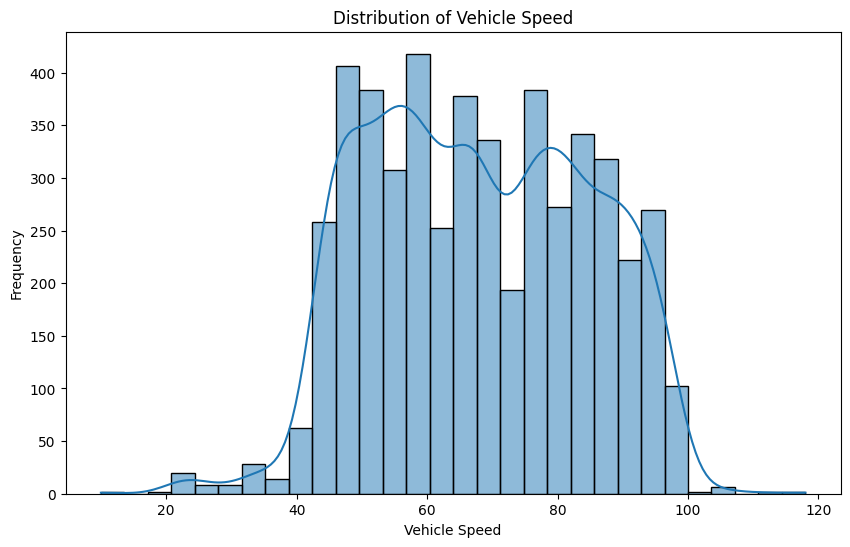

In [ ]:
# Vehicle Speed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Vehicle_Speed'], bins=30, kde=True)
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

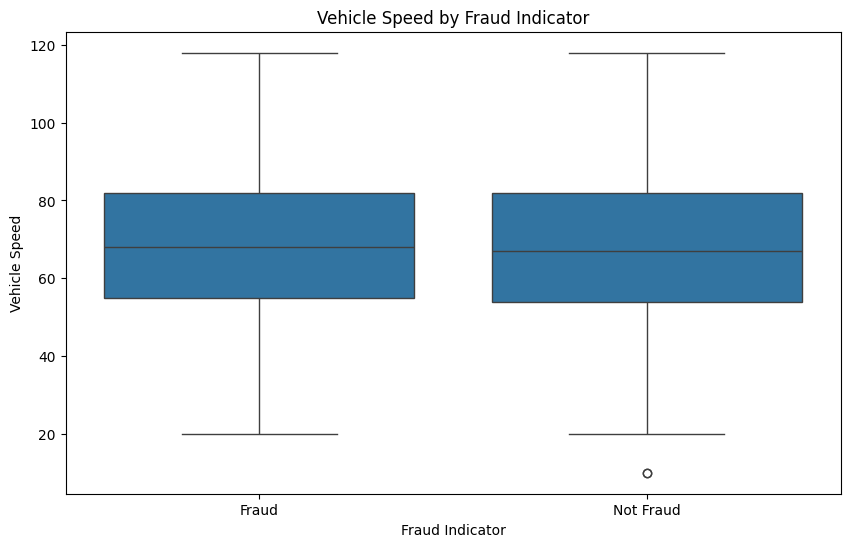

In [ ]:
# Relationship between Vehicle Speed and Fraud Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=df)
plt.title('Vehicle Speed by Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Vehicle Speed')
plt.show()

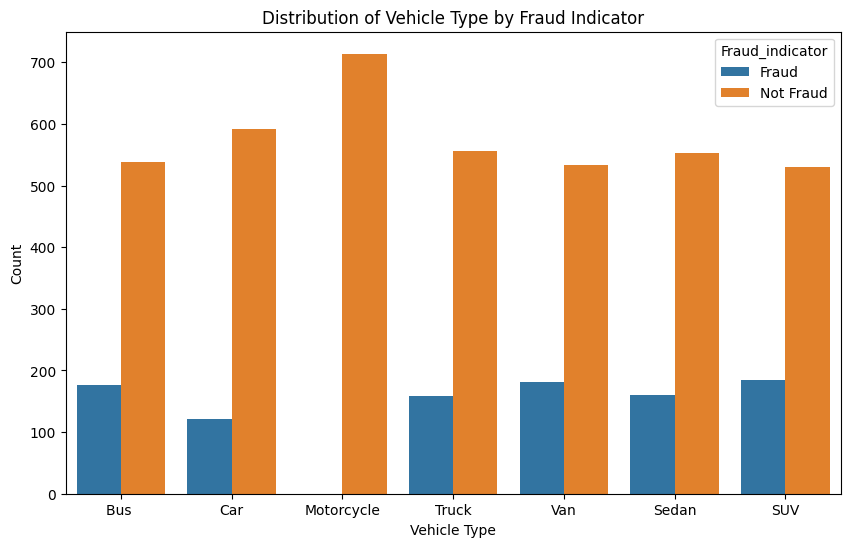

In [ ]:
# Distribution of Vehicle Type
if 'Vehicle_Type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=df)
    plt.title('Distribution of Vehicle Type by Fraud Indicator')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Count')
    plt.show()

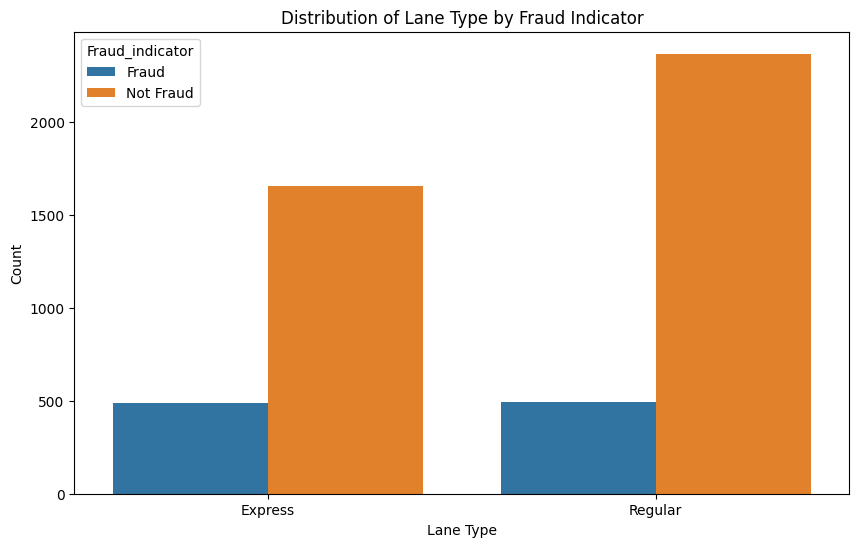

In [ ]:
# Distribution of Lane Type
if 'Lane_Type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=df)
    plt.title('Distribution of Lane Type by Fraud Indicator')
    plt.xlabel('Lane Type')
    plt.ylabel('Count')
    plt.show()

<ipython-input-11-4408d3cdc183>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-11-4408d3cdc183>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-11-4408d3cdc183>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-11-4408d3cdc183>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.t

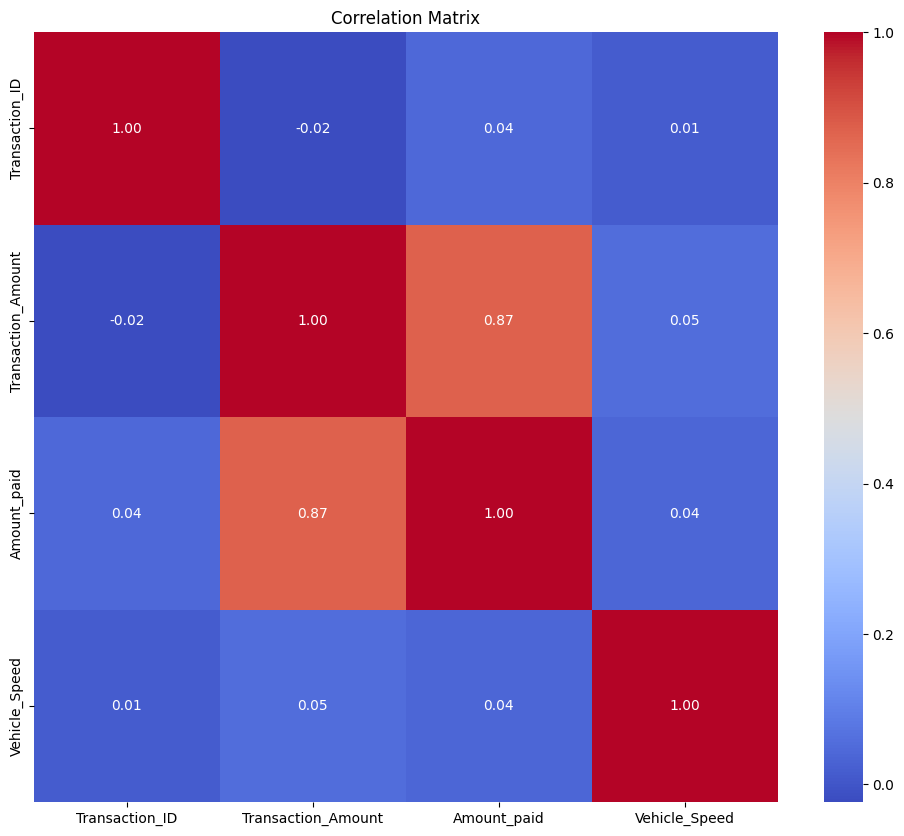


'Fraud_indicator' not found in the correlation matrix.


In [ ]:
# Convert datetime columns to datetime format
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
        except ValueError:
            pass

# Drop datetime columns for correlation calculation
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlation with the target variable
if 'Fraud_indicator' in corr_matrix.columns:
    print("\nCorrelation of features with Fraud Indicator:")
    print(corr_matrix['Fraud_indicator'].sort_values(ascending=False))
else:
    print("\n'Fraud_indicator' not found in the correlation matrix.")


# **Step 2: Feature Engineering**

In [ ]:
# Convert 'Timestamp' to datetime and extract relevant features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Saturday and Sunday

# Drop irrelevant columns
columns_to_drop = ['Transaction_ID', 'FastagID', 'TollBoothID', 'Vehicle_Plate_Number']


# Identify categorical columns excluding 'Fraud_indicator'
categorical_features = df.select_dtypes(include=['object']).columns.drop('Fraud_indicator').tolist()

# Perform one-hot encoding for categorical variables excluding 'Fraud_indicator'
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Check the updated dataframe
print("Updated DataFrame:")
print(df.head())


Updated DataFrame:
   Transaction_ID           Timestamp  Transaction_Amount  Amount_paid  \
0               1 2023-01-06 11:20:00                 350          120   
1               2 2023-01-07 14:55:00                 120          100   
2               3 2023-01-08 18:25:00                   0            0   
3               4 2023-01-09 02:05:00                 350          120   
4               5 2023-01-10 06:35:00                 140          100   

   Vehicle_Speed Fraud_indicator  Hour  DayOfWeek  IsWeekend  \
0             65           Fraud    11          4          0   
1             78           Fraud    14          5          1   
2             53       Not Fraud    18          6          1   
3             92           Fraud     2          0          0   
4             60           Fraud     6          1          0   

   Vehicle_Type_Car  ...  Vehicle_Plate_Number_WB34OP7890  \
0             False  ...                            False   
1              True  ...     

In [ ]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Transaction_Amount', 'Amount_paid',
       'Vehicle_Speed', 'Fraud_indicator', 'Hour', 'DayOfWeek', 'IsWeekend',
       'Vehicle_Type_Car',
       ...
       'Vehicle_Plate_Number_WB34OP7890', 'Vehicle_Plate_Number_WB34QR1234',
       'Vehicle_Plate_Number_WB34ST5678', 'Vehicle_Plate_Number_WB34UV5678',
       'Vehicle_Plate_Number_WB34UV9012', 'Vehicle_Plate_Number_WB34WX1234',
       'Vehicle_Plate_Number_WB34WX4567', 'Vehicle_Plate_Number_WB34WX7890',
       'Vehicle_Plate_Number_WB34YZ3456', 'Vehicle_Plate_Number_WB34YZ6789'],
      dtype='object', length=9476)

# **Step 3: Model Development**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert 'Timestamp' to datetime and extract relevant features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Saturday and Sunday

# Drop irrelevant columns
columns_to_drop = ['Transaction_ID', 'FastagID', 'TollBoothID', 'Vehicle_Plate_Number']
df = df.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid errors if columns are already dropped

# Identify categorical columns excluding 'Fraud_indicator'
categorical_features = df.select_dtypes(include=['object']).columns.drop('Fraud_indicator').tolist()

# Split the dataset into features (X) and target variable (y)
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define preprocessing steps for categorical and numerical features
categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns)
    ])

# Define the Logistic Regression model within a Pipeline
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       Fraud       1.00      0.75      0.86       295
   Not Fraud       0.94      1.00      0.97      1205

    accuracy                           0.95      1500
   macro avg       0.97      0.87      0.91      1500
weighted avg       0.95      0.95      0.95      1500

Confusion Matrix:
[[ 221   74]
 [   0 1205]]
Accuracy Score:
0.9506666666666667


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df is your DataFrame containing the dataset
# Load your dataset and preprocess it as needed

# Example preprocessing steps (replace with actual preprocessing logic)
# Convert 'Timestamp' to datetime and extract relevant features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Saturday and Sunday

# Drop irrelevant columns
columns_to_drop = ['Transaction_ID', 'FastagID', 'TollBoothID', 'Vehicle_Plate_Number']
df = df.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid errors if columns are already dropped

# Identify categorical columns excluding 'Fraud_indicator'
categorical_features = df.select_dtypes(include=['object']).columns.drop('Fraud_indicator').tolist()

# Define preprocessing steps for categorical and numerical features
categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns)
    ])

# Split the dataset into features (X) and target variable (y)
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the Logistic Regression model within a Pipeline
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found by Grid Search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Make predictions on the test set with the best model
best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)

# Evaluate model performance
print("\nTest Set Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Cross-validation Accuracy: 0.9882857142857142

Test Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

       Fraud       1.00      0.89      0.94       295
   Not Fraud       0.97      1.00      0.99      1205

    accuracy                           0.98      1500
   macro avg       0.99      0.95      0.96      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix:
[[ 263   32]
 [   0 1205]]
Accuracy Score:
0.9786666666666667


In [ ]:
df.columns


Index(['Timestamp', 'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed',
       'Fraud_indicator', 'Hour', 'DayOfWeek', 'IsWeekend', 'Vehicle_Type_Car',
       'Vehicle_Type_Motorcycle',
       ...
       'Vehicle_Plate_Number_WB34OP7890', 'Vehicle_Plate_Number_WB34QR1234',
       'Vehicle_Plate_Number_WB34ST5678', 'Vehicle_Plate_Number_WB34UV5678',
       'Vehicle_Plate_Number_WB34UV9012', 'Vehicle_Plate_Number_WB34WX1234',
       'Vehicle_Plate_Number_WB34WX4567', 'Vehicle_Plate_Number_WB34WX7890',
       'Vehicle_Plate_Number_WB34YZ3456', 'Vehicle_Plate_Number_WB34YZ6789'],
      dtype='object', length=9475)

# **Step 4: Real-time Fraud Detection:**


In [ ]:
# Identify categorical columns excluding 'Fraud_indicator'
categorical_features = df.select_dtypes(include=['object']).columns.drop('Fraud_indicator').tolist()

# Split the dataset into features (X) and target variable (y)
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

# Define preprocessing steps for categorical and numerical features
categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns)
    ])

# Define the Logistic Regression model within a Pipeline
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])

# Train the model
lr_model.fit(X, y)

# Function to preprocess and predict fraud in real-time
def predict_fraud(transaction_data):
    # Convert 'Timestamp' to datetime and extract relevant features
    transaction_data['Timestamp'] = pd.to_datetime(transaction_data['Timestamp'])
    transaction_data['Hour'] = transaction_data['Timestamp'].dt.hour
    transaction_data['DayOfWeek'] = transaction_data['Timestamp'].dt.dayofweek
    transaction_data['IsWeekend'] = transaction_data['DayOfWeek'].isin([5, 6]).astype(int)
    transaction_data = transaction_data.drop(columns=columns_to_drop, errors='ignore')

    # Predict using the trained model
    predictions = lr_model.predict(transaction_data)
    return predictions

# Example usage:
new_transactions = pd.DataFrame({
    'Timestamp': ['2024-06-30 08:30', '2024-06-30 12:45'],  # Example timestamps
    'Transaction_Amount': [100, 250],  # Example transaction amounts
    'Amount_paid': [100, 250],  # Example amount paid
    'Vehicle_Speed': [60, 80],  # Example vehicle speed
    'Vehicle_Type': ['Car', 'Truck']  # Example vehicle types
})

fraud_predictions = predict_fraud(new_transactions)
print("Fraud Predictions for New Transactions:")
print(fraud_predictions)

Fraud Predictions for New Transactions:
['Not Fraud' 'Not Fraud']


In [ ]:
import joblib

# Assuming lr_model is your hypertuned Logistic Regression model

# Save the model to disk
joblib.dump(lr_model, 'logistic_regression_model.pkl')

# To load the model later, you can use:
# lr_model = joblib.load('logistic_regression_model.pkl')


['logistic_regression_model.pkl']

# **Step 5: Explanatory Analysis**


In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the top features contributing to fraud detection
print("Top features contributing to fraud detection:")
print(feature_importances_df.head(10))  # Adjust number of top features as needed

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Features Contributing to Fraud Detection')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


NameError: name 'rf_model' is not defined